In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

In [71]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [72]:
faces = fetch_lfw_people(min_faces_per_person= 60)

In [73]:
faces.images.shape

(1348, 62, 47)

In [98]:
data = faces['data']
data.shape

(1348, 2914)

In [75]:
n = 150

In [83]:
# Cach 1: Dung SVD
avg_faces = np.mean(data, axis=0)
u, s, vT = np.linalg.svd(data-avg_faces)
transform_data = avg_faces + u[:,:n] @ np.diag(s[:n]) @ vT[:n,:]
transform_data.shape

(1348, 2914)

Text(0, 0.5, '150 dim reconstruction')

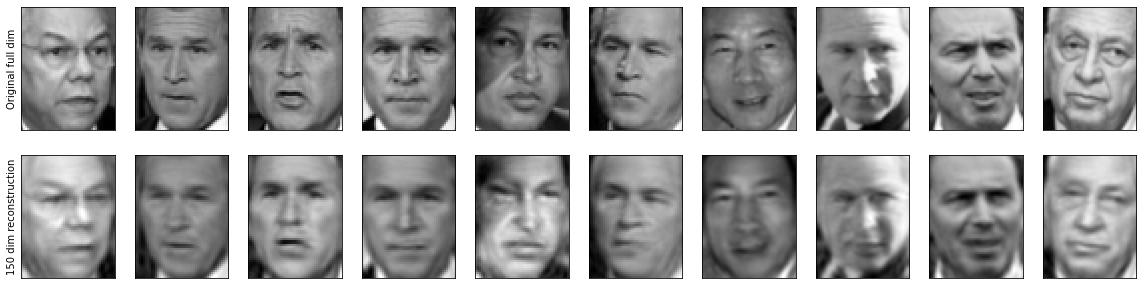

In [84]:
# Visualize ket qua cach 1 cho 10 anh dau tien:
fig, ax = plt.subplots(2, 10, figsize=(20,5), subplot_kw={'xticks': [], 'yticks': []})

for i in range(10):
    ax[0, i].imshow(data[i].reshape(62,47), cmap='gray')
    ax[1, i].imshow(transform_data[i].reshape(62,47), cmap='gray')
ax[0,0].set_ylabel('Original full dim')
ax[1,0].set_ylabel('150 dim reconstruction')


In [99]:
# Cach 2: Dung PCA(150)
pca = PCA(150)
pca.fit(data)

PCA(n_components=150)

In [101]:
T = pca.transform(data)

In [103]:
data_recon = pca.inverse_transform(T)
data_recon.shape

(1348, 2914)

Text(0, 0.5, '150 dim reconstruction')

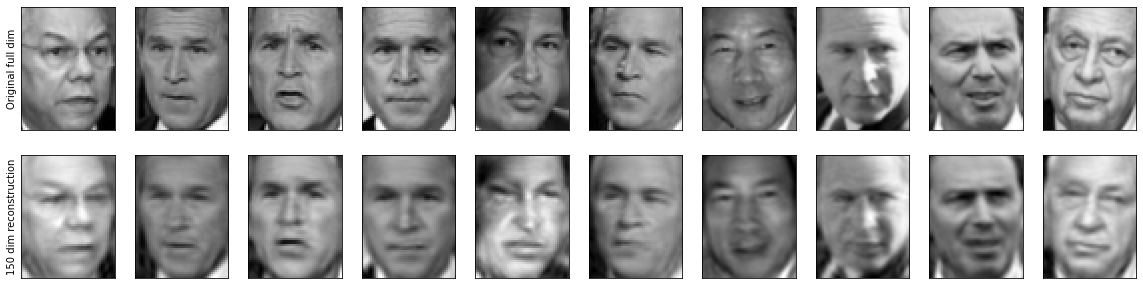

In [104]:
fig, ax = plt.subplots(2, 10, figsize=(20,5), subplot_kw={'xticks': [], 'yticks': []})

for i in range(10):
    ax[0, i].imshow(data[i].reshape(62,47), cmap='gray')
    ax[1, i].imshow(data_recon[i].reshape(62,47), cmap='gray')
ax[0,0].set_ylabel('Original full dim')
ax[1,0].set_ylabel('150 dim reconstruction')

In [106]:
np.sum(pca.explained_variance_ratio_)

0.94573104